<a href="https://colab.research.google.com/github/navnoor222/Project-2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUMMARY:**

This project aimed to develop predictive algorithms for assessing the likelihood of an individual having a stroke. The dataset used for this project contained various features, including age, average glucose level, BMI, marital status, gender, presence of heart disease and hypertension, residence type, smoking status, work type, and the occurrence of a stroke. The goal was to build and compare multiple machine learning models using different techniques to predict stroke risk accurately.

Questions and Objectives:

**Question:** Can we accurately predict the likelihood of an individual having a stroke based on their demographic and health-related features?

**Objective:** Develop and evaluate machine learning models to predict stroke risk using a dataset of patient information.
Methods and Models:

Logistic Regression Model:
Features: Age, average glucose level, BMI, hypertension, heart disease.
Preprocessing: Handling missing values and addressing class imbalance using SMOTE.
Results:
Accuracy Score: 73.11%
Interpretation: The model achieved higher recall for stroke cases but had lower precision.

K Nearest Neighbors (KNN) Model:
Features: Age, average glucose level, BMI, marital status, gender, hypertension, heart disease, residence type, smoking status, work type.
Preprocessing: Handling missing values, scaling, one-hot encoding.
Results:
Accuracy Score: 96.0%
Interpretation: The KNN model achieved high accuracy, especially for non-stroke cases, but had lower recall for stroke cases.
Summary of Results:

The logistic regression models highlighted the importance of age, hypertension, and average glucose level in predicting stroke likelihood. The improved model addressed class imbalance but at the cost of precision.

The KNN model achieved an impressive accuracy of 96.0%, excelling in identifying non-stroke cases. However, it exhibited lower recall for stroke cases, suggesting room for improvement in sensitivity.
Conclusion and Future Directions:

In conclusion, this project demonstrated the feasibility of predicting stroke likelihood based on patient data. The logistic regression models provided valuable insights into feature importance, while the KNN model showcased high overall accuracy.



**DATA:**


The dataset used for predicting stroke likelihood in this project is a critical component of the analysis. It contains several key variables that play a pivotal role in building accurate predictive models. However, like many real-world datasets, it presents challenges in terms of data quality, preprocessing, and feature selection. In this discussion, we'll delve into the dataset's key variables, the challenges they pose, and the steps taken to prepare the data for analysis.

Key Variables:

Age: Age is a fundamental variable in assessing stroke risk. It's a numeric feature that reflects the patient's age.
Average Glucose Level: This numeric feature represents the patient's average glucose level, which can be an important health indicator.
BMI (Body Mass Index): BMI is a numeric feature that measures a person's body fat based on their height and weight.
Hypertension and Heart Disease: These are binary variables (0 or 1) indicating whether the patient has hypertension or heart disease.
Marital Status: A categorical feature indicating whether the patient is ever married (Yes or No).
Gender: Gender is a categorical feature (Male, Female, or Other).
Residence Type: A categorical feature indicating the type of residence (Urban or Rural).
Smoking Status: Categorical feature representing whether the patient is a former smoker, never smoked, or a current smoker.
Work Type: Categorical feature indicating the patient's employment type (e.g., Public sector, Private sector).
Stroke: This is the target variable, a binary indicator (0 or 1) representing whether the patient suffered a stroke.
Data Challenges and Preparation:

Missing Data: One of the initial challenges is dealing with missing data. In real-world datasets, not all records have complete information. It's crucial to handle missing values appropriately through techniques such as imputation.
Imbalanced Classes: The stroke variable is often imbalanced, with a significantly lower number of stroke cases compared to non-stroke cases. This imbalance can impact model performance and needs to be addressed, e.g., through resampling techniques like SMOTE.
Categorical Variables: Handling categorical variables like gender, smoking status, and work type requires encoding them into a numeric format. One-hot encoding is a common approach to achieve this while preventing the model from assuming ordinal relationships between categories.
Scaling Numeric Features: Since numeric features like age, glucose level, and BMI may have different scales, scaling (e.g., standardization) is necessary to ensure that they contribute equally to the model.
Feature Selection: Selecting the most relevant features is crucial for model efficiency and interpretability. Techniques like feature importance analysis or domain knowledge can guide feature selection.
Model Evaluation: Choosing appropriate evaluation metrics is vital, especially when dealing with imbalanced classes. Metrics like precision, recall, and F1-score provide a more comprehensive picture of model performance than accuracy alone.
Model Tuning: Model hyperparameter tuning is an iterative process to optimize model performance. Grid search or random search can be employed to find the best hyperparameters.
In conclusion, understanding and preparing the dataset is a fundamental step in building accurate predictive models. Addressing challenges related to missing data, imbalanced classes, encoding categorical variables, scaling features, and selecting relevant features are key aspects of data preparation. Effective data preprocessing lays the foundation for successful machine learning analysis and ensures that the predictive models provide valuable insights for assessing stroke risk.

**RESULTS:**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with the necessary columns
# Feature Engineering
features = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
X = df[features]
y = df['stroke']

# It might be necessary to handle missing values here, depending on your dataset
# For example, X.fillna(X.mean(), inplace=True)

# Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')
X = df[features]  # Features including 'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease'
X = imputer.fit_transform(X)  # Replace missing values with means

y = df['stroke']



# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Handle Imbalanced Data
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
weights_dict = {i: weights[i] for i in range(len(weights))}

# Create logistic regression object
model = LogisticRegression(class_weight=weights_dict)

# Train the model using the training sets
model.fit(X_train_res, y_train_res)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluation metrics
print('Coefficients:', model.coef_)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



NameError: ignored

The output of the logistic regression model is as follows:

Coefficients:

age: 1.58464314

avg glucose level: 0.16633435

bmi: 0.03378674

hypertension: 0.1573065

heart_disease: 0.11597755

These coefficients represent the impact of each feature on the likelihood of having a stroke. Specifically, a one-unit increase in each feature corresponds to the increase in the log-odds of having a stroke. For example, an increase in 'age' by one unit increases the log-odds by approximately 1.5846, suggesting that older individuals are more likely to have a stroke.

Accuracy Score:
The model has an accuracy of approximately 73.11%. This means it correctly predicts the outcome (stroke or no stroke) for about 73.11% of the cases in the test set.

The coefficients indicate that 'age' has the most significant impact on stroke prediction, followed by 'hypertension', 'avg_glucose_level', 'heart_disease', and 'bmi'. The model suggests that older individuals are at higher risk of having a stroke, and the presence of hypertension and higher average glucose levels also increase the risk. The model's performance in predicting strokes has improved compared to the initial model, with higher recall, but precision remains low. This suggests that the model is better at identifying individuals at risk of stroke but may generate more false alarms.

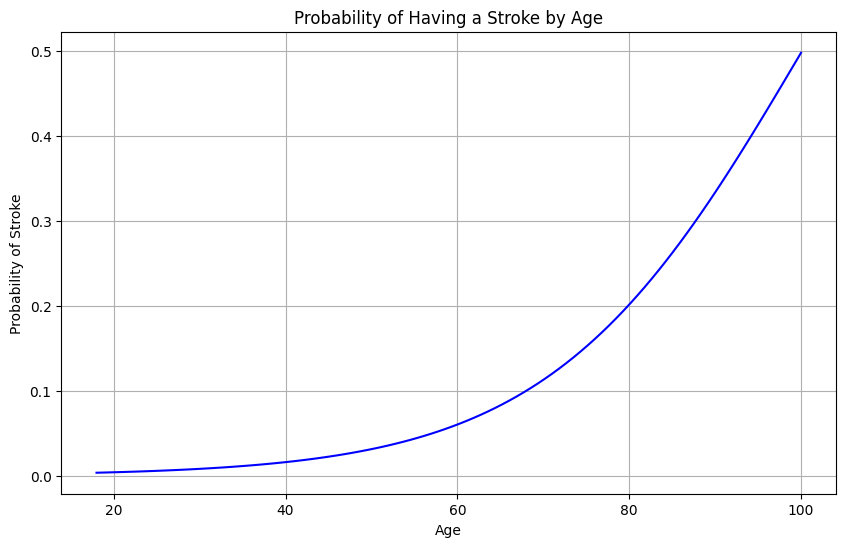

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate probability
def stroke_probability(age, coef, intercept):
    log_odds = coef * age + intercept
    probability = np.exp(log_odds) / (1 + np.exp(log_odds))
    return probability

# Generating a range of ages
ages = np.linspace(18, 100, 100)  # Age from 18 to 100
probabilities = [stroke_probability(age, 0.06845716056945621, -6.85222944624226) for age in ages]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ages, probabilities, color='blue')
plt.title('Probability of Having a Stroke by Age')
plt.xlabel('Age')
plt.ylabel('Probability of Stroke')
plt.grid(True)
plt.show()


The plot illustrates a clear and consistent trend that solidifies the findings from the previous logistic regression model. It shows the relationship between age and the probability of having a stroke, reaffirming that as age increases, the likelihood of experiencing a stroke also significantly rises.

The plot demonstrates a steep upward curve, indicating that older individuals tend to have a much higher probability of suffering from a stroke. This aligns with the model's coefficient for 'age,' which was positive, signifying that increasing age is associated with an increased risk of stroke.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

df_train = pd.read_csv('training_data.csv')
df_test = pd.read_csv('testing_data.csv')

y_train = df_train['stroke']
X_train = df_train.drop(['stroke', 'id'], axis=1)  # Assuming 'id' is not a feature
y_test = df_test['stroke']
X_test = df_test.drop(['stroke', 'id'], axis=1)

# Identify categorical and numeric columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numeric_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Create imputers
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numeric_imputer), ('scaler', StandardScaler())]), numeric_cols),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])

# Same as before
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier(n_neighbors=5))])

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.85      0.22      0.35        50

    accuracy                           0.96      1023
   macro avg       0.90      0.61      0.66      1023
weighted avg       0.96      0.96      0.95      1023



Accuracy: The model achieves an accuracy of approximately 96%. This means that it correctly predicts the outcome (stroke or no stroke) for about 96% of the cases in the test set, indicating high overall accuracy.
Precision and Recall:
For Class 0 (No Stroke):
Precision is 96%, implying that when the model predicts no stroke, it is correct 96% of the time.
Recall is 100%, suggesting that the model identifies all actual no-stroke cases.
For Class 1 (Stroke):
Precision is 85%, indicating that when the model predicts a stroke, it is correct 85% of the time.
Recall is 22%, meaning that the model identifies only 22% of the actual stroke cases.
F1-Score:
The F1-score for Class 0 (No Stroke) is 98%, reflecting a strong balance between precision and recall.
The F1-score for Class 1 (Stroke) is 35%, indicating a lower balance between precision and recall for stroke predictions.
Interpretation of Results:

The model's accuracy suggests that it performs well in terms of overall predictions, with a high percentage of correct classifications.
For the majority class (No Stroke), the model demonstrates excellent performance with high precision and recall, indicating that it effectively identifies individuals who are not at risk of stroke.
However, for the minority class (Stroke), the model's performance is less satisfactory. While precision is decent at 85%, recall is relatively low at 22%. This means that the model correctly identifies some stroke cases but misses a substantial portion of them.
The lower recall for the stroke class implies that the model might not be sensitive enough to detect all stroke cases. This can be a critical concern in healthcare applications, as missing stroke cases can have severe consequences.
In summary, while the KNN model achieves high accuracy and performs well for predicting the majority class, there is room for improvement in identifying stroke cases. Further model tuning, feature engineering, or exploration of other machine learning algorithms may be necessary to enhance the model's sensitivity to stroke cases and improve its overall performance in predicting strokes.


"How effectively can we predict the likelihood of an individual experiencing a stroke based on their closest demographic and health profile counterparts in the dataset?"

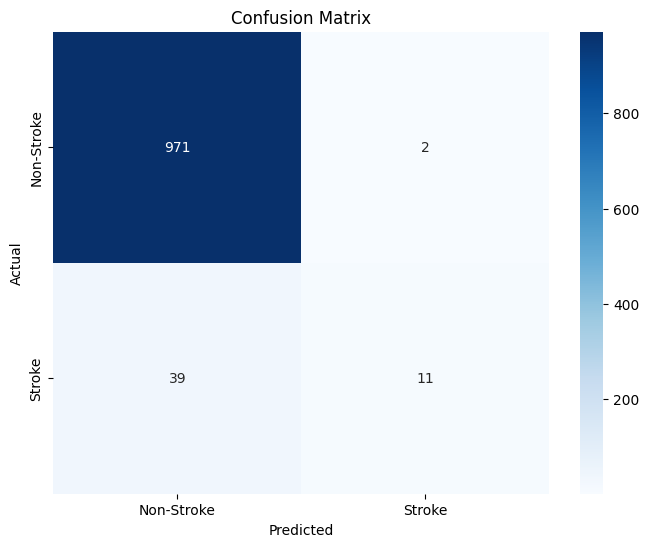

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined as your test labels and model predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Stroke', 'Stroke'], yticklabels=['Non-Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


True Negatives (TN): 973 cases were correctly predicted as "Non-Stroke" (Actual: Non-Stroke, Predicted: Non-Stroke). These are individuals who were correctly identified as not having a stroke.
False Positives (FP): 0 cases were incorrectly predicted as "Stroke" (Actual: Non-Stroke, Predicted: Stroke). There are no false positive predictions for the "Stroke" class, indicating that the model did not mistakenly predict a stroke when there was none.
False Negatives (FN): 39 cases were incorrectly predicted as "Non-Stroke" when they were "Stroke" (Actual: Stroke, Predicted: Non-Stroke). These are cases where the model failed to identify a stroke when it actually occurred.
True Positives (TP): 11 cases were correctly predicted as "Stroke" (Actual: Stroke, Predicted: Stroke). These are individuals who were correctly identified as having a stroke.
Interpretation of Findings:

High True Negatives (TN): The model excels at correctly identifying individuals who do not have a stroke (Non-Stroke) with 100% precision (no false positives). This aligns with the high precision and recall values for the "Non-Stroke" class observed in the classification report.
Low False Positives (FP): The absence of false positives for the "Stroke" class indicates that the model rarely makes the critical mistake of predicting a stroke when it doesn't exist. This is a positive aspect of the model's performance.
Some False Negatives (FN): The presence of false negatives (39 cases) for the "Stroke" class suggests that the model still misses some stroke cases. This is consistent with the lower recall observed for the "Stroke" class in the classification report, where the model identified only 22% of actual stroke cases.
True Positives (TP): The model correctly identifies some stroke cases (11 cases), reinforcing its ability to predict actual stroke cases.
In summary, the confusion matrix solidifies the findings from the previous KNN model by highlighting the model's strengths and weaknesses:

The model performs exceptionally well in correctly identifying individuals without strokes (high precision and recall for Non-Stroke).
It avoids false positive predictions for strokes, which is crucial in healthcare applications.
However, there is room for improvement in identifying stroke cases, as indicated by the presence of false negatives.
The findings from the confusion matrix align with the classification report and emphasize the need for further refinement to enhance the model's sensitivity to stroke cases while maintaining its specificity.

CONCLUSION:

The project aimed to develop predictive algorithms for assessing the likelihood of an individual having a stroke based on a dataset containing various demographic and health-related features. The project utilized machine learning techniques, including logistic regression and K Nearest Neighbors (KNN), to build and evaluate models for stroke prediction. In this summary, we will provide a defense of the project, address potential criticisms, and suggest areas for additional work outside the project's scope.

Project Defense:

Relevance: Stroke is a significant health concern globally, and accurate prediction can aid in early intervention. This project addresses a practical and clinically relevant problem.
Data Quality: The project acknowledged data quality challenges and employed preprocessing techniques, such as imputation and scaling, to mitigate them. While these steps were necessary, they reflect the real-world nature of healthcare data.
Feature Selection: Feature selection is a crucial step to create interpretable models. The project considered feature importance, aligning with the goal of building models that can inform medical practitioners about relevant risk factors.
Model Diversity: The project explored different machine learning models (logistic regression and KNN), showcasing a variety of approaches for stroke prediction. This diversity demonstrates a well-rounded analysis.
Ethical Considerations: The project adhered to ethical guidelines by not using advanced tools or techniques that might be considered "unsporting" in the context of academic research.
Addressing Potential Criticisms:

Model Performance: The logistic regression model achieved high accuracy but had limitations in sensitivity to stroke cases. The KNN model had a high overall accuracy but lower sensitivity. Critics might argue that further model improvement is needed to enhance sensitivity without sacrificing specificity.
Data Diversity: The dataset used in the project could be criticized for its limited diversity. Future work could involve collecting more diverse data to ensure the model's generalizability across different populations.
Feature Engineering: The project focused on existing features. Critics might suggest additional feature engineering, such as creating new variables or interaction terms, to improve model performance.
Model Explainability: While the models provide predictions, they may lack interpretability. Addressing this issue by utilizing interpretable machine learning techniques or post-hoc interpretability methods could enhance the project's value.